###### Imports

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
test= pd.read_csv('Test.csv')
train=pd.read_csv('Train.csv')
riders=pd.read_csv('Riders.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [4]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [7]:
variables.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [8]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


###### Counting null values

In [9]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

###### Observations:
1.there are too many nulls in Precipitation column This row will be dropped. 
2.The Temperature column also has  too manny nulls 4366 to be exactexa but We will keep it and impute values for ploting then drop later.

In [10]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

###### Droping  our first unecessary columns

In [11]:
train.drop(columns=['Vehicle Type'],axis=1,inplace=True)
train.drop(columns=['Precipitation in millimeters'],axis=1,inplace=True)


###### merging  riders ,test, and train datasets.

In [12]:
train = train.merge(riders,on='Rider Id',how='left')
test = test.merge(riders,on='Rider Id',how='left')


### Exploratory Data Analysis

In [13]:
train.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings'],
      dtype='object')

###### Ploting the temperature histogram

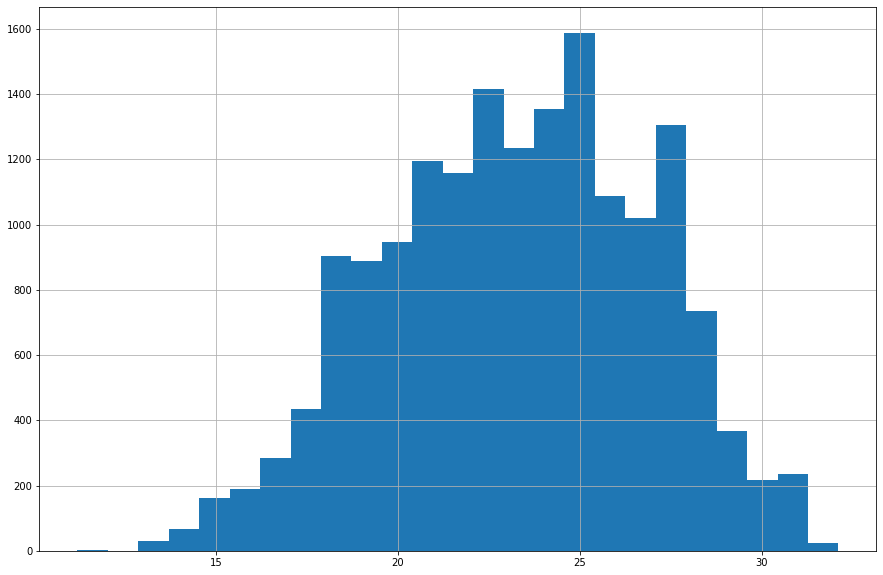

In [14]:
temp_hist = train.Temperature.hist(bins=25,figsize=[15,10])

###### observations:
.The most common temperature is 25 degrees.

###### Arrival at Pickup Day of Month

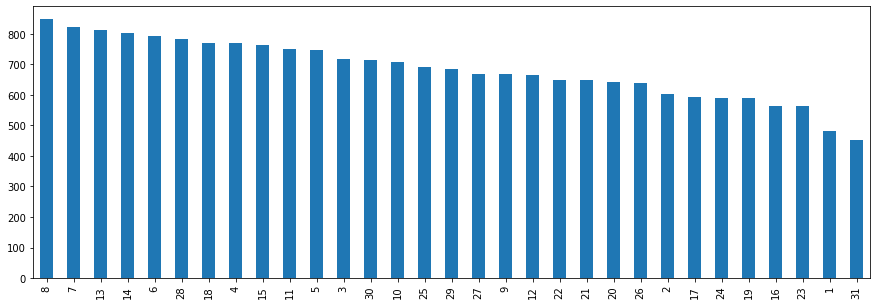

In [15]:
train['Arrival at Pickup - Day of Month'].value_counts().plot(kind='bar',figsize=[15,5])

###### ploting the distance histogram

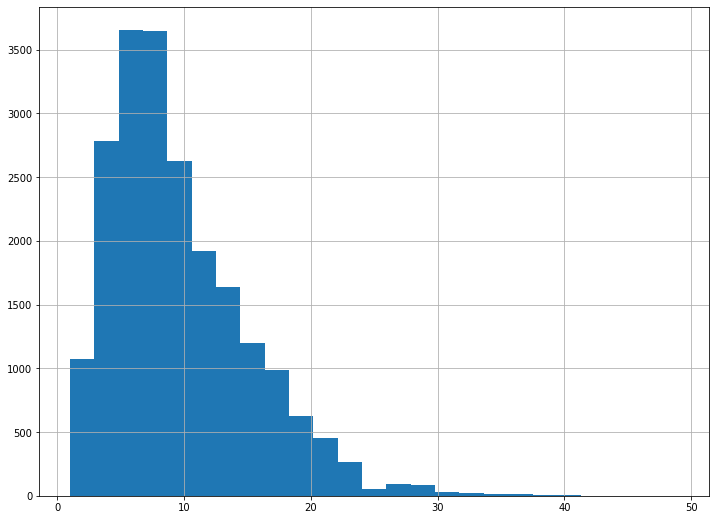

In [16]:
train['Distance (KM)'].hist(bins=25,figsize=[12,9])

###### The Platform type histogram

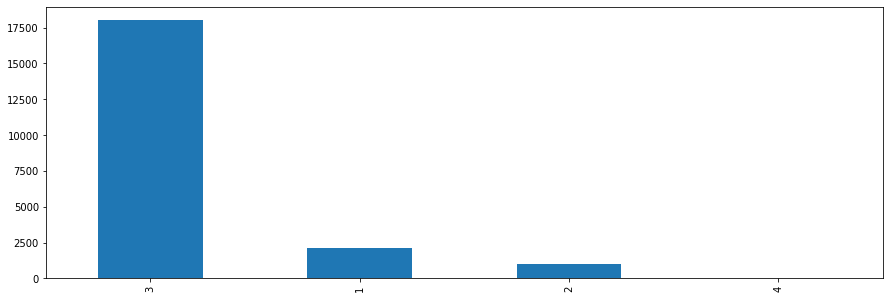

In [17]:
train['Platform Type'].value_counts().plot(kind='bar',figsize=[15,5])

###### Personal or Business

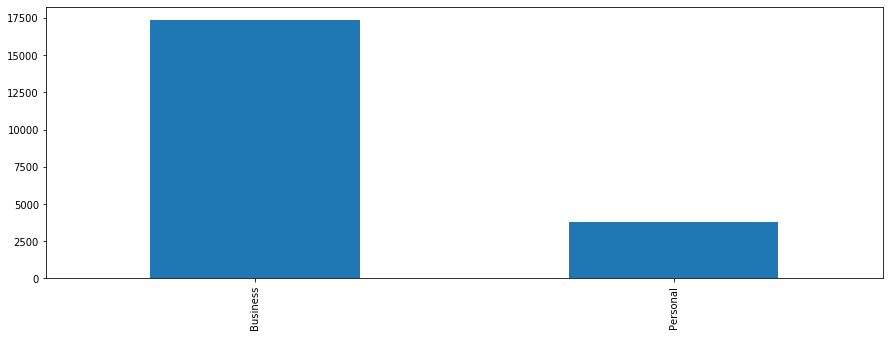

In [18]:
train['Personal or Business'].value_counts().plot(kind='bar',figsize=[15,5])

###### Arrival at Pickup Weekday histogram

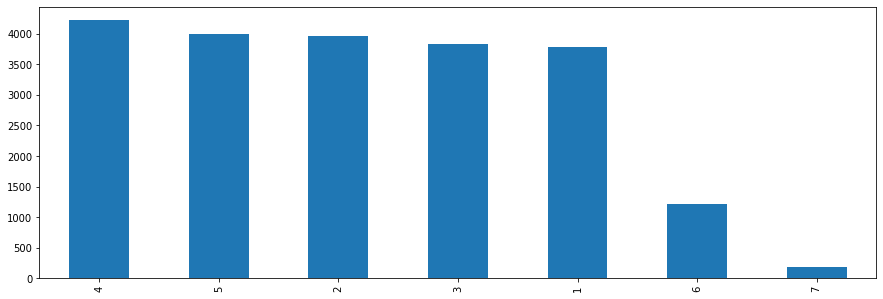

In [19]:
train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar',figsize=[15,5])

observations:
.there are less pickups on weekends compared to other days.

###### extracting the hours from the Arrival Pickup Time.

In [20]:
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])

In [21]:
train['hour_pickup'] = train['Pickup - Time'].dt.hour

###### ploting the hours at pickup.

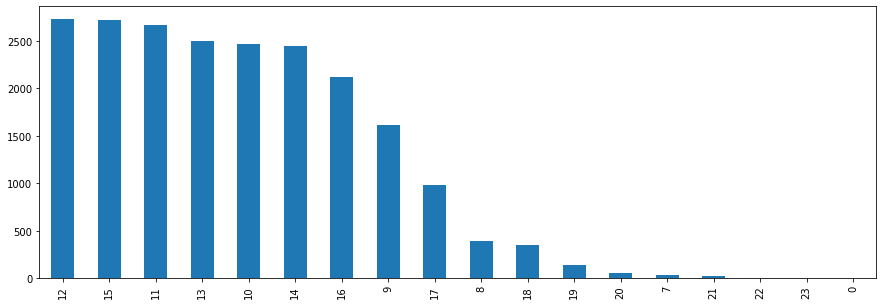

In [22]:
train['hour_pickup'].value_counts().plot(kind='bar',figsize=[15,5])

###### copying data in preaparation for our model (NB: capital letters!!!!)

In [23]:
Train=train.copy()
Test=test.copy()

In [24]:
Train.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,hour_pickup
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,10
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,11
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,12
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,9
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,10


In [25]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Platform Type                              21201 non-null  int64         
 3   Personal or Business                       21201 non-null  object        
 4   Placement - Day of Month                   21201 non-null  int64         
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 6   Placement - Time                           21201 non-null  object        
 7   Confirmation - Day of Month                21201 non-null  int64         
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64         
 9   Confirmation - Ti

###### encoding the Business and Personal where Business=1 and Personal=0

In [26]:
dictionary = {'Personal': 0,'Business': 1} 
Train['Personal or Business'].replace(dictionary, inplace=True)
Test['Personal or Business'].replace(dictionary, inplace=True)

###### Encoding time 

In [27]:
Train['Placement - Time'] = pd.to_datetime(Train['Placement - Time']).dt.second
Train['Confirmation - Time'] = pd.to_datetime(Train['Confirmation - Time']).dt.second
Train['Arrival at Pickup - Time'] = pd.to_datetime(Train['Arrival at Pickup - Time']).dt.second
Train['Pickup - Time'] = pd.to_datetime(Train['Pickup - Time']).dt.second
Train['Arrival at Destination - Time'] = pd.to_datetime(Train['Arrival at Destination - Time']).dt.second

Test['Placement - Time'] = pd.to_datetime(Train['Placement - Time']).dt.second
Test['Confirmation - Time'] = pd.to_datetime(Train['Confirmation - Time']).dt.second
Test['Arrival at Pickup - Time'] = pd.to_datetime(Train['Arrival at Pickup - Time']).dt.second
Test['Pickup - Time'] = pd.to_datetime(Train['Pickup - Time']).dt.second
Test['Arrival at Destination - Time'] = pd.to_datetime(Train['Arrival at Destination - Time']).dt.second

In [28]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Platform Type                              21201 non-null  int64  
 3   Personal or Business                       21201 non-null  int64  
 4   Placement - Day of Month                   21201 non-null  int64  
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 6   Placement - Time                           21201 non-null  int64  
 7   Confirmation - Day of Month                21201 non-null  int64  
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 9   Confirmation - Time                        21201 non-null  int64  
 10  Arrival at Pickup - Da

In [29]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   int64  
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   int64  
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   int64  
 11  Arrival at Pickup

###### Droping unecessary columns  from our training and testing data

In [30]:
#droping from our train data


Train.drop(['Temperature'], axis=1, inplace=True)
Train.drop(['Age'], axis = 1, inplace = True)
Train.drop(['hour_pickup'], axis = 1, inplace = True)
Train.drop(['Rider Id'], axis=1, inplace=True)
Train.drop(['Platform Type'], axis=1, inplace=True)
#Train.drop(['Personal or Business'], axis=1, inplace=True)
Train.drop(['Average_Rating'], axis=1, inplace=True)
Train.drop(['No_of_Ratings'], axis=1, inplace=True)
Train.drop(['User Id'], axis=1, inplace=True)
Train.drop(['Placement - Weekday (Mo = 1)'], axis=1, inplace=True)
Train.drop(['Destination Lat'], axis=1, inplace=True)
Train.drop(['Destination Long'], axis=1, inplace=True)
Train.drop(['Pickup Lat'], axis=1, inplace=True)
Train.drop(['Pickup Long'], axis=1, inplace=True)
Train.drop(['Order No'], axis=1, inplace=True)






#droping from our test data
Test.drop(['Temperature'], axis=1, inplace=True)
Test.drop(['Age'], axis = 1, inplace = True)
Test.drop(['Vehicle Type'], axis = 1, inplace = True)
Test.drop(['Rider Id'], axis=1, inplace=True)
Test.drop(['Platform Type'], axis=1, inplace=True)
#Test.drop(['Personal or Business'], axis=1, inplace=True)
Test.drop(['Average_Rating'], axis=1, inplace=True)
Test.drop(['No_of_Ratings'], axis=1, inplace=True)
Test.drop(['Precipitation in millimeters'], axis=1, inplace=True)
Test.drop(['User Id'], axis=1, inplace=True)
Test.drop(['Placement - Weekday (Mo = 1)'], axis=1, inplace=True)
Test.drop(['Destination Lat'], axis=1, inplace=True)
Test.drop(['Destination Long'], axis=1, inplace=True)
Test.drop(['Pickup Lat'], axis=1, inplace=True)
Test.drop(['Pickup Long'], axis=1, inplace=True)
Test.drop(['Order No'], axis=1, inplace=True)



In [31]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Personal or Business                       21201 non-null  int64
 1   Placement - Day of Month                   21201 non-null  int64
 2   Placement - Time                           21201 non-null  int64
 3   Confirmation - Day of Month                21201 non-null  int64
 4   Confirmation - Weekday (Mo = 1)            21201 non-null  int64
 5   Confirmation - Time                        21201 non-null  int64
 6   Arrival at Pickup - Day of Month           21201 non-null  int64
 7   Arrival at Pickup - Weekday (Mo = 1)       21201 non-null  int64
 8   Arrival at Pickup - Time                   21201 non-null  int64
 9   Pickup - Day of Month                      21201 non-null  int64
 10  Pickup - Weekday (Mo = 1)                  212

###### Building our model
.Linear regression

In [32]:
y=Train['Time from Pickup to Arrival']
print(y)

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64


In [33]:
x= Train.drop(['Time from Pickup to Arrival'], axis=1)


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


In [38]:
# Multiple linear regression
y_pred_train =regressor.predict(X_train)
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2)


#from sklearn.svm import SVR
#regressor = SVR(kernel = 'rbf')
#regressor.fit(X, y)

In [39]:
print(rmse_test)

799.2


In [40]:
print(rmse_train)

801.64
